# Hello everyone its Day 13 today we have Supermarket Ordering, Invoicing, and Sales Analysis

This data set provides an in-depth look into the ordering, invoicing and sales processes at a supermarket. With information ranging from customers' meal choices to the value of their orders and whether they were converted into sales, this dataset opens up endless possibilities to uncover consumer behavior trends and engagement within the business. From understanding who is exchanging with the company and when, to seeing what types of meals are most popular with consumers, this rich collection of data will allow us to gain priceless insights into consumer actions and habits that can inform strategic decisions. Dive deep into big data now by exploring Invoices.csv, OrderLeads.csv and SalesTeam.csv for invaluable knowledge about your customers!

In [1]:
## import libraries 
import pandas as pd 
import numpy as np 
import missingno as msno
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
'''Data_source="https://zenodo.org/record/4092667#.Y83_G3ZBxhF"  '''

##import multiple data 
invoive_data=pd.read_csv("Invoices.csv")
order_data=pd.read_csv("OrderLeads.csv")
sales_Data=pd.read_csv("SalesTeam.csv")

In [3]:
## convert  all data in  a single data useing  merge function in pandas 
d1=pd.merge(invoive_data,order_data)
d2=pd.merge(d1,sales_Data)
data=d2
# first five rows of data 
data.head()

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Company Name,Order Value,Converted,Sales Rep,Sales Rep Id
0,839FKFW2LLX4LMBB,27-05-2016,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 07:00:00+02:00,['David Bishop'],469,Breakfast,Chimera-Chasing Casbah,4837,0,Jessie Mcallister,97UNNAT790E0WM4N
1,97OX39BGVMHODLJM,27-09-2018,J0MMOOPP709DIDIE,LJKS5NK6788CYMUU,2018-10-01 20:00:00+02:00,['David Bishop'],22,Dinner,Chimera-Chasing Casbah,343,0,Jessie Mcallister,97UNNAT790E0WM4N
2,041ORQM5OIHTIU6L,24-08-2014,E4UJLQNCI16UX5CS,LJKS5NK6788CYMUU,2014-08-23 14:00:00+02:00,['Karen Stansell'],314,Lunch,Chimera-Chasing Casbah,4185,0,Jessie Mcallister,97UNNAT790E0WM4N
3,YT796QI18WNGZ7ZJ,12-04-2014,C9SDFHF7553BE247,LJKS5NK6788CYMUU,2014-04-07 21:00:00+02:00,['Addie Patino'],438,Dinner,Chimera-Chasing Casbah,5839,0,Jessie Mcallister,97UNNAT790E0WM4N
4,6YLROQT27B6HRF4E,28-07-2015,48EQXS6IHYNZDDZ5,LJKS5NK6788CYMUU,2015-07-27 14:00:00+02:00,['Addie Patino' 'Susan Guerrero'],690,Lunch,Chimera-Chasing Casbah,8841,0,Jessie Mcallister,97UNNAT790E0WM4N


In [4]:
##cheaking null value 
data.isnull().sum()

Order Id        0
Date            0
Meal Id         0
Company Id      0
Date of Meal    0
Participants    0
Meal Price      0
Type of Meal    0
Company Name    0
Order Value     0
Converted       0
Sales Rep       0
Sales Rep Id    0
dtype: int64

In [5]:
## cheaking dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50017 entries, 0 to 50016
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order Id      50017 non-null  object
 1   Date          50017 non-null  object
 2   Meal Id       50017 non-null  object
 3   Company Id    50017 non-null  object
 4   Date of Meal  50017 non-null  object
 5   Participants  50017 non-null  object
 6   Meal Price    50017 non-null  int64 
 7   Type of Meal  50017 non-null  object
 8   Company Name  50017 non-null  object
 9   Order Value   50017 non-null  int64 
 10  Converted     50017 non-null  int64 
 11  Sales Rep     50017 non-null  object
 12  Sales Rep Id  50017 non-null  object
dtypes: int64(3), object(10)
memory usage: 5.3+ MB


In [6]:
data['Date']=pd.to_datetime(data['Date'], errors='coerce',utc=True)

C:\Users\kabir\AppData\Local\Temp\ipykernel_2388\3063773426.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date']=pd.to_datetime(data['Date'], errors='coerce',utc=True)


In [7]:
new_data=data[['Participants','Meal Price','Type of Meal','Company Name','Order Value','Converted','Sales Rep','Date']]

In [8]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50017 entries, 0 to 50016
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Participants  50017 non-null  object             
 1   Meal Price    50017 non-null  int64              
 2   Type of Meal  50017 non-null  object             
 3   Company Name  50017 non-null  object             
 4   Order Value   50017 non-null  int64              
 5   Converted     50017 non-null  int64              
 6   Sales Rep     50017 non-null  object             
 7   Date          50017 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 3.4+ MB


In [9]:
new_data['day'] = (new_data['Date']).dt.day
new_data['month'] = (new_data['Date']).dt.month
new_data['year'] = (new_data['Date']).dt.year


C:\Users\kabir\AppData\Local\Temp\ipykernel_2388\1735274465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['day'] = (new_data['Date']).dt.day
C:\Users\kabir\AppData\Local\Temp\ipykernel_2388\1735274465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['month'] = (new_data['Date']).dt.month
C:\Users\kabir\AppData\Local\Temp\ipykernel_2388\1735274465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

# EDA

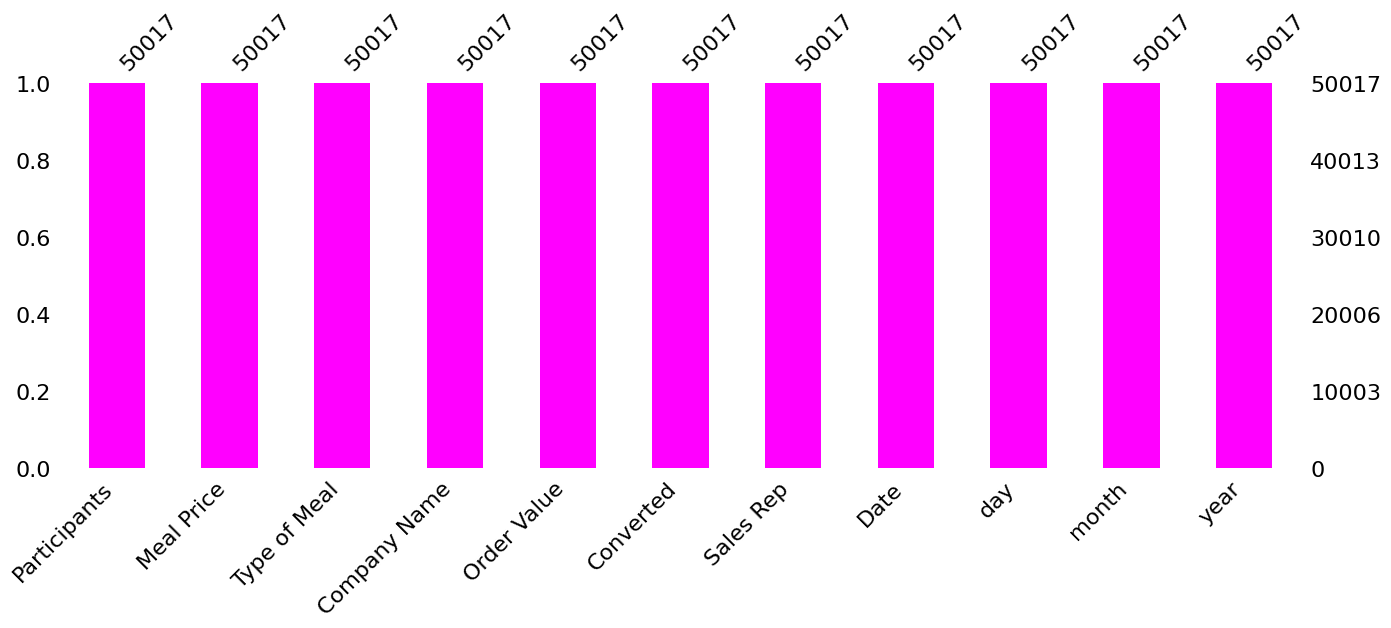

In [10]:
## cheaking the columns 
msno.bar(new_data, figsize = (16,5),color = "magenta")
plt.show()

C:\Users\kabir\AppData\Local\Temp\ipykernel_2388\3502361606.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_data.corr(),annot=True)


<AxesSubplot: >

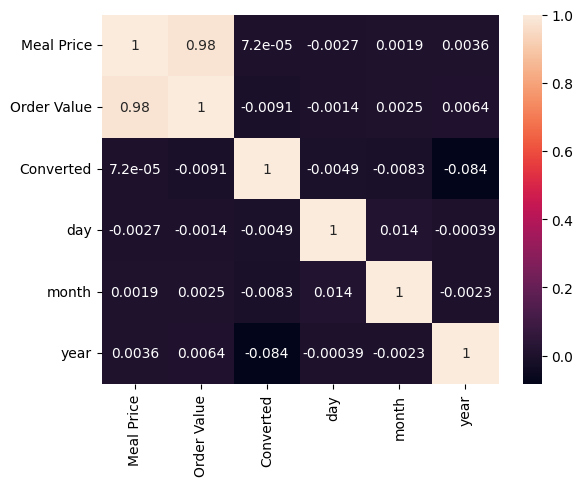

In [11]:
##cheaking relationships 
sns.heatmap(new_data.corr(),annot=True)

<AxesSubplot: >

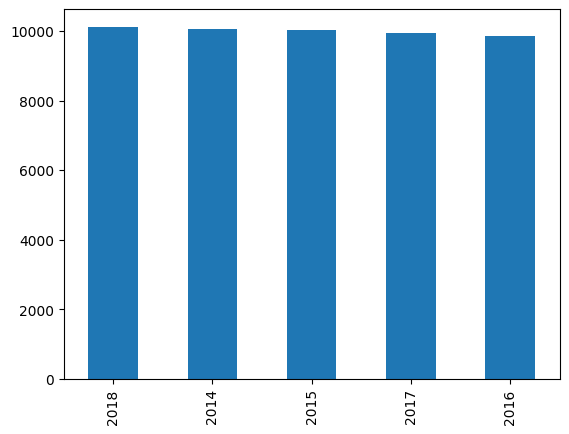

In [12]:
## now cheak which year has get maximum orders 
new_data['year'].value_counts().plot.bar()

year  Type of Meal
2014  Dinner          3388
      Breakfast       3361
      Lunch           3320
2015  Dinner          3361
      Breakfast       3342
      Lunch           3336
2016  Breakfast       3303
      Lunch           3282
      Dinner          3272
2017  Lunch           3370
      Breakfast       3298
      Dinner          3269
2018  Dinner          3442
      Breakfast       3359
      Lunch           3314
Name: Type of Meal, dtype: int64
----------------------------------------------------------------------------------------------------


<AxesSubplot: xlabel='year', ylabel='counts'>

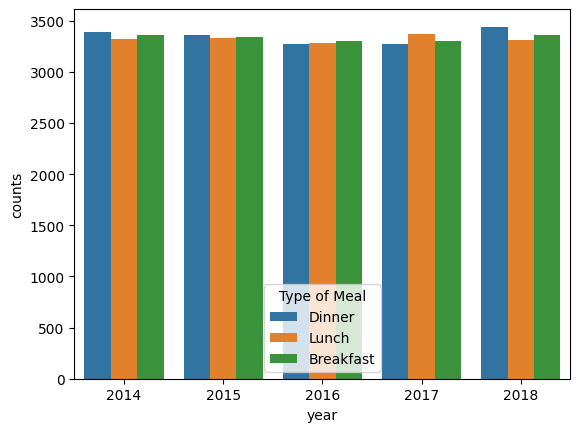

In [44]:
## now we cheak which typpe of meal is orderd per year 

print(new_data.groupby('year')['Type of Meal'].value_counts())
print('----------------------------------------------------------------------------------------------------')
n_d=new_data[['year','Type of Meal']].value_counts()
data_of_meals_type=pd.DataFrame(n_d,columns=['counts'])
data_of_meals_type.reset_index(inplace=True)
sns.barplot(data=data_of_meals_type, x="year", y="counts", hue="Type of Meal")

<AxesSubplot: >

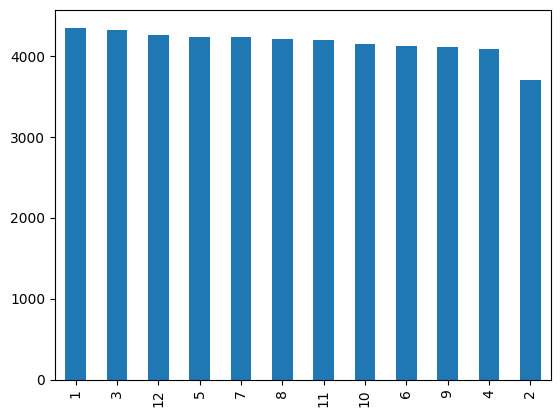

In [47]:
## now cheak which month has get maximum orders 
new_data['month'].value_counts().plot.bar()

month  Type of Meal
1      Lunch           1466
       Dinner          1447
       Breakfast       1441
2      Breakfast       1276
       Lunch           1258
       Dinner          1169
3      Breakfast       1447
       Lunch           1446
       Dinner          1433
4      Breakfast       1406
       Lunch           1393
       Dinner          1291
5      Dinner          1457
       Lunch           1439
       Breakfast       1346
6      Dinner          1396
       Lunch           1379
       Breakfast       1354
7      Breakfast       1439
       Lunch           1414
       Dinner          1388
8      Dinner          1470
       Lunch           1382
       Breakfast       1358
9      Lunch           1375
       Breakfast       1372
       Dinner          1366
10     Dinner          1403
       Lunch           1390
       Breakfast       1358
11     Dinner          1439
       Breakfast       1417
       Lunch           1338
12     Dinner          1473
       Breakfast       1449


<AxesSubplot: xlabel='month', ylabel='counts'>

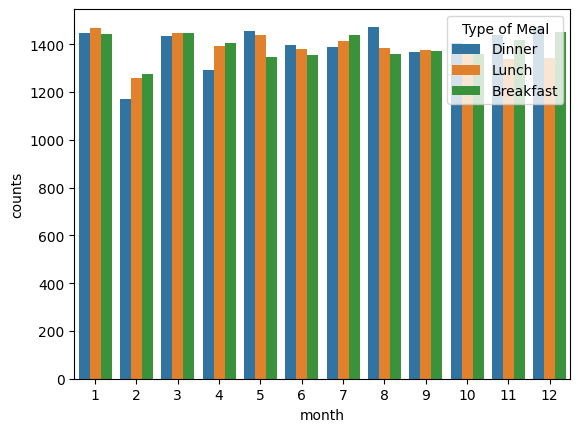

In [48]:
## now we cheak which typpe of meal is orderd per month

print(new_data.groupby('month')['Type of Meal'].value_counts())
print('----------------------------------------------------------------------------------------------------')
n_d=new_data[['month','Type of Meal']].value_counts()
data_of_meals_type=pd.DataFrame(n_d,columns=['counts'])
data_of_meals_type.reset_index(inplace=True)
sns.barplot(data=data_of_meals_type, x="month", y="counts", hue="Type of Meal")

--> As we seen from above observation that  2018 has highest no of order in it and maximum people has order dinner
--> or as we seen january has maximum nno or order in which most of the people order lunch 

<AxesSubplot: xlabel='Converted', ylabel='count'>

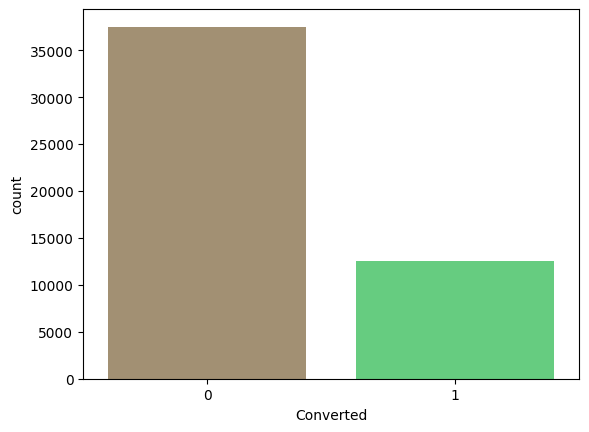

In [51]:
sns.countplot(x="Converted", data =new_data,palette="terrain_r",)

[]

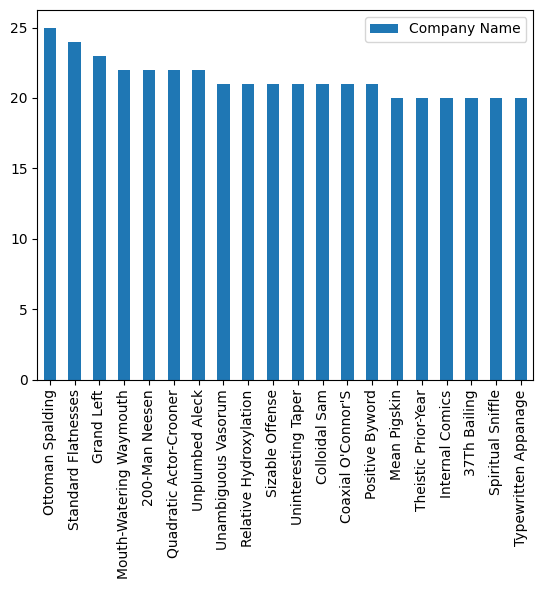

In [57]:
#top 20 company which has  maximum orders 
new_data['Company Name'].value_counts().head(20).plot.bar()
plt.legend()
plt.plot()

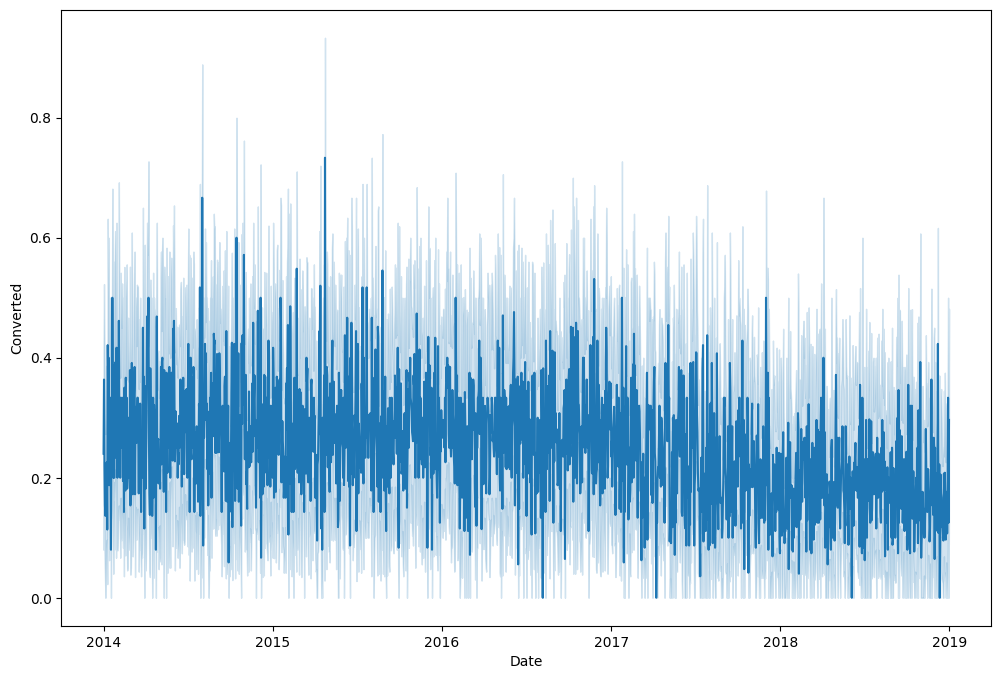

In [61]:
plt.figure(figsize = (12,8))
sns.lineplot(x = 'Date', y = 'Converted', data =new_data)
plt.show()


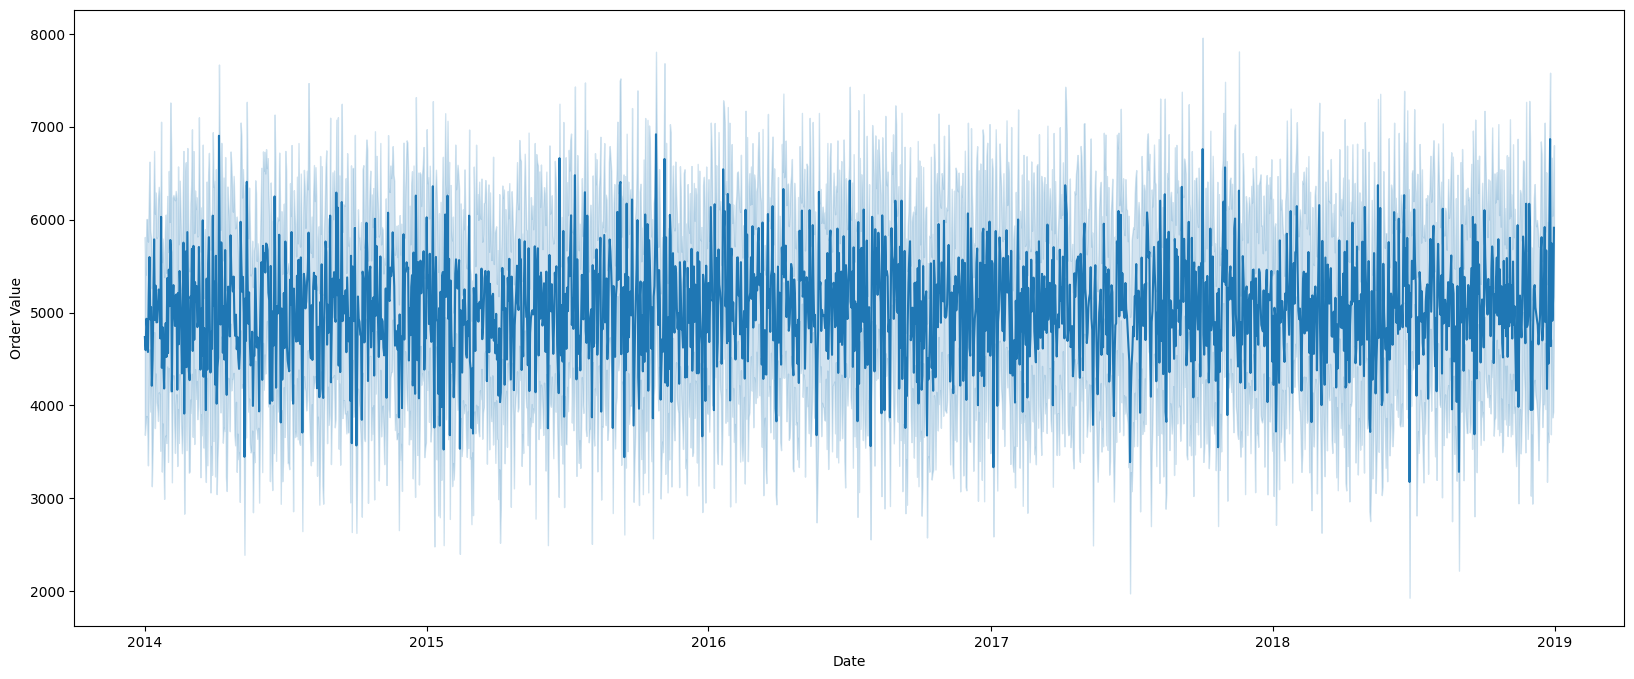

In [69]:
plt.figure(figsize = (20,8))
sns.lineplot(x = 'Date', y = 'Order Value', data =new_data)
plt.show()


In [67]:
new_data.head()

,Participants,Meal Price,Type of Meal,Company Name,Order Value,Converted,Sales Rep,Date,day,month,year
0,['David Bishop'],469,Breakfast,Chimera-Chasing Casbah,4837,0,Jessie Mcallister,2016-05-27 00:00:00+00:00,27,5,2016
1,['David Bishop'],22,Dinner,Chimera-Chasing Casbah,343,0,Jessie Mcallister,2018-09-27 00:00:00+00:00,27,9,2018
2,['Karen Stansell'],314,Lunch,Chimera-Chasing Casbah,4185,0,Jessie Mcallister,2014-08-24 00:00:00+00:00,24,8,2014
3,['Addie Patino'],438,Dinner,Chimera-Chasing Casbah,5839,0,Jessie Mcallister,2014-12-04 00:00:00+00:00,4,12,2014
4,['Addie Patino' 'Susan Guerrero'],690,Lunch,Chimera-Chasing Casbah,8841,0,Jessie Mcallister,2015-07-28 00:00:00+00:00,28,7,2015


<AxesSubplot: xlabel='Order Value', ylabel='Meal Price'>

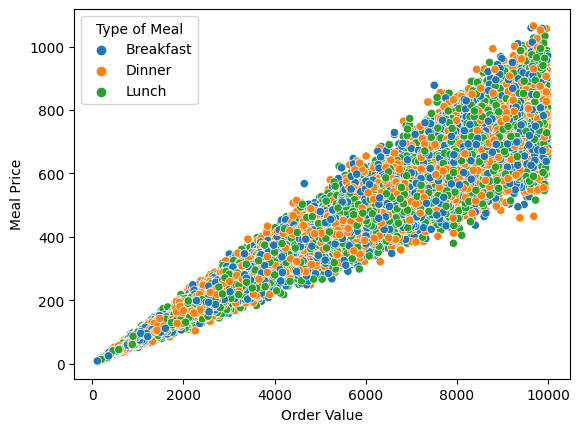

In [72]:
sns.scatterplot(data=new_data, x="Order Value", y="Meal Price", hue="Type of Meal")

In [73]:
new_data.to_csv('clean_data')